# Binary Logistic Regression on MNIST with numpy

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import tensorflow as tf
np.set_printoptions(threshold=np.inf)

# Data Preparation

In [2]:
# import mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def filter_zeros_and_ones(images, labels):
    logical_mask_0 = labels == 0
    logical_mask_1 = labels == 1

    images_zeros = images[logical_mask_0]
    labels_zeros = labels[logical_mask_0]
    images_ones = images[logical_mask_1]
    labels_ones = labels[logical_mask_1]

    X = np.concatenate((images_zeros, images_ones), axis=0)
    y = np.concatenate((labels_zeros, labels_ones), axis=0)

    # shuffle the data and corresponding labels in unison
    def _shuffle_in_unison(a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return a[p], b[p]

    return _shuffle_in_unison(X, y)

In [4]:
print ("whole train Dataset shape:")
print("x_train:",x_train.shape, " y_train:", y_train.shape)
print("x_test:",x_test.shape, " y_test:", y_test.shape)
print("---")
X_test, y_test = X, y = filter_zeros_and_ones(x_test, y_test)
X, y = filter_zeros_and_ones(x_train, y_train)
y = y[:,np.newaxis]
y_test = y_test[:,np.newaxis]
X = X.reshape(X.shape[0], X.shape[1] *X.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] *X_test.shape[2])
print ("Keeping only ones and zeros, reshaping:")
print("xshape: ", X.shape, " yshape: ", y.shape)
print("X_test:",X_test.shape, " y_test:", y_test.shape)



whole train Dataset shape:
x_train: (60000, 28, 28)  y_train: (60000,)
x_test: (10000, 28, 28)  y_test: (10000,)
---
Keeping only ones and zeros, reshaping:
xshape:  (12665, 784)  yshape:  (12665, 1)
X_test: (2115, 784)  y_test: (2115, 1)


C:\Users\johan\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


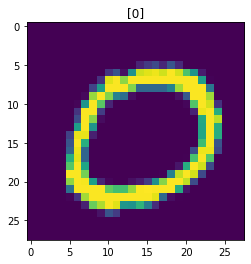

In [5]:
#show an exmaple image and label
plt.imshow(X[0].reshape(28,28)) 
plt.title(y[0])
plt.show()

In [6]:
# number of features n
n_samples, n_features = X.shape
print("n_features: ", n_features)
print("n_samples: ", n_samples)

n_features:  784
n_samples:  12665


# Model definition

In [7]:
# define sigmoid nonlinearity
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def predict(X, weights):
    return sigmoid(np.dot(X, weights))

In [9]:
def get_loss(predictions, labels):
    
    epsilon = 1e-5 #add epsilon to prevent having -inf costs
    observations = len(labels)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions + epsilon)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions + epsilon)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = -cost.sum() / observations

    return cost

In [10]:
def get_gradient(X, labels, predictions):
    N = len(X)
    gradient = np.dot(X.T,  predictions - labels)
    gradient /= N
    return gradient


In [11]:
# we need to define our model parameters to be learned.
mu, sigma = 0, 0.01  # mean and standard deviation
weights = np.random.normal(mu, sigma, X.shape[1])
weights = weights[:,np.newaxis]
print("weights shape ", weights.shape)

weights shape  (784, 1)


In [12]:
#Hyperparams

learning_rate = 0.00001
# number iterations for gradient descent (gdc)
gdc_steps = 40

# Training

In [13]:
loss_history = []

for step in range(0, gdc_steps):
    print("Performing step " + str(step) + " of gradient descent.")
    predictions = predict(X, weights)
    loss = get_loss (predictions, y)
    loss_history.append(loss)
    print("Loss at step " + str(step) + ": " + str(loss))
    gradient = get_gradient(X, y, predictions)
    
    # update weights using the gdc update rule
    weights = weights - learning_rate * gradient
    
    # compute the predictions, i.e. whenever predictions is greater or equal to 0.5 we get class 1
    # and cast them to int values
    predictions = predictions.round(0).astype(int)
    
    # compute mean accuracy by looking if the predictions match the labels y and applying the np.mean function to the result
    accuracy = (predictions == y).mean()
    print("Accuracy at step " + str(step) + ": " + str(accuracy))
    print("----")

Performing step 0 of gradient descent.
Loss at step 0: 221.25696678011647
Accuracy at step 0: 0.48914330833004344
----
Performing step 1 of gradient descent.
Loss at step 1: 279.6557135722831
Accuracy at step 1: 0.5604421634425583
----
Performing step 2 of gradient descent.
Loss at step 2: 269.1740290621622
Accuracy at step 2: 0.6355309909198579
----
Performing step 3 of gradient descent.
Loss at step 3: 227.34579501053935
Accuracy at step 3: 0.7070667193051717
----
Performing step 4 of gradient descent.
Loss at step 4: 183.85013236597857
Accuracy at step 4: 0.7627319384129491
----
Performing step 5 of gradient descent.
Loss at step 5: 149.48488425605893
Accuracy at step 5: 0.8070272404263719
----
Performing step 6 of gradient descent.
Loss at step 6: 124.25663223005259
Accuracy at step 6: 0.8388472167390446
----
Performing step 7 of gradient descent.
Loss at step 7: 105.98593897013797
Accuracy at step 7: 0.8619028819581523
----
Performing step 8 of gradient descent.
Loss at step 8: 92

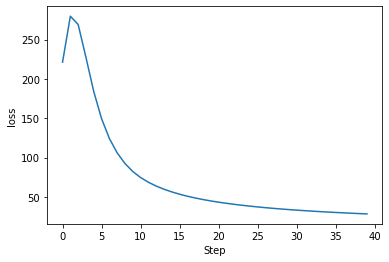

In [14]:
plt.plot(loss_history)
plt.xlabel('Step')
plt.ylabel('loss')
plt.show()

# Evaluation on Test Set

In [15]:
predictions = predict(X_test, weights)
loss = get_loss (predictions, y_test)
print("Loss on Test data: " + str(loss))

# compute the predictions, i.e. whenever predictions is greater or equal to 0.5 we get class 1
# and cast them to int values
predictions = predictions.round(0).astype(int)

# compute mean accuracy by looking if the predictions match the labels y and applying the np.mean function to the result
accuracy = (predictions == y_test).mean()
print("Accuracy  on Test data:" + str(accuracy))

Loss on Test data: 24.183082876278263
Accuracy  on Test data:0.9716312056737588


## Sample test of 10 examples

In [16]:
predictions = predict(X_test[:10], weights)
predictions = predictions.round(0).astype(int)

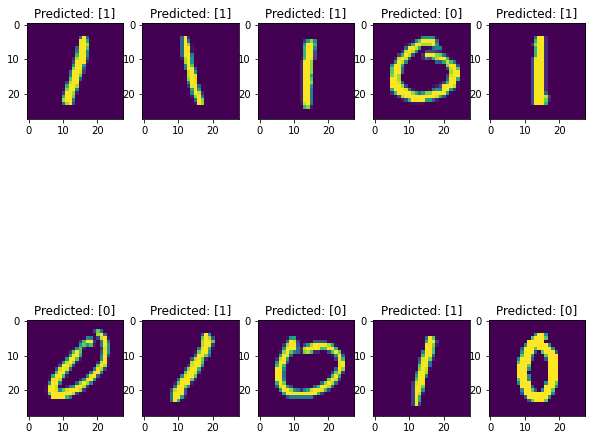

In [17]:
nrows, ncols = 2, 5  # array of sub-plots
figsize = [10, 10]     # figure size, inches

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    img = X_test[i].reshape(28,28)
    axi.imshow(img)
    axi.set_title("Predicted: "+ str(predictions[i]))
plt.show()